In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import 
from keras.backend import tensorflow_backend as K

ImportError: cannot import name 'np_utils' from 'tensorflow.keras.utils' (/home/sc82choi/miniconda3/envs/tf20-alpha/lib/python3.7/site-packages/tensorflow/python/keras/api/_v2/keras/utils/__init__.py)

In [0]:
train_images = np.load('/content/gdrive/My Drive/kmnist/k49-train-imgs.npz')['arr_0']/255.0
test_images = np.load('/content/gdrive/My Drive/kmnist/k49-test-imgs.npz')['arr_0']/255.0
train_labels = np.load('/content/gdrive/My Drive/kmnist/k49-train-labels.npz')['arr_0']
test_labels = np.load('/content/gdrive/My Drive/kmnist/k49-test-labels.npz')['arr_0']


Text(0.5, 0, '30')

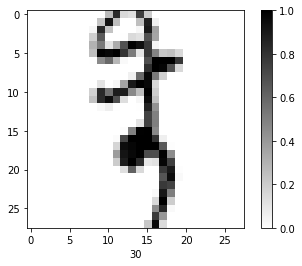

In [5]:
plt.figure()
plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.colorbar()
plt.xlabel(train_labels[0])

In [0]:
x_train = train_images.reshape(train_images.shape[0],-1)
x_test = test_images.reshape(test_images.shape[0],-1)

In [0]:
y_train = np_utils.to_categorical(train_labels, 49)
y_test = np_utils.to_categorical(test_labels, 49)

In [0]:
model = Sequential()
model.add(Dense(128,input_dim=28*28, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(49, activation='softmax'))

In [12]:
#tensorflow 2.0에서는 안됨...
import os

tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)


AttributeError: ignored

In [0]:
tpu_model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])
tpu_model.fit(x_train, y_train, batch_size = 128, epochs=20)

Epoch 1/20
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(16,), dtype=tf.int32, name='core_id_70'), TensorSpec(shape=(16, 784), dtype=tf.float32, name='dense_13_input_10'), TensorSpec(shape=(16, 49), dtype=tf.float32, name='dense_15_target_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Cloning SGD {'lr': 0.009999999776482582, 'momentum': 0.0, 'decay': 0.0, 'nesterov': False}
INFO:tensorflow:Remapping placeholder for dense_13_input
INFO:tensorflow:KerasCrossShard: <tensorflow.python.keras.optimizers.SGD object at 0x7f9330d1e828> []
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 5.1991472244262695 secs
INFO:tensorflow:Setting weights on TPU model.
INFO:tensorflow:CPU -> TPU lr: 0.009999999776482582 {0.01}
INFO:tensorflow:CPU -> TPU momentum: 0.0 {0.0}
INFO:tensorflow:CPU -> TPU decay: 0.0 {0.0}
232192/232365 [============================>.] - ETA: 0s - loss: 3.4741 - acc: 0.1309IN

In [0]:
model = Sequential()
model.add(Dense(512,input_dim=28*28, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(49, activation='softmax'))

In [35]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size = 128, epochs=10)

Epoch 1/10
232365/232365 [==============================] - 25s 109us/sample - loss: 1.3134 - accuracy: 0.6553
Epoch 2/10
232365/232365 [==============================] - 26s 112us/sample - loss: 0.8671 - accuracy: 0.7659
Epoch 3/10
232365/232365 [==============================] - 26s 111us/sample - loss: 0.7703 - accuracy: 0.7906
Epoch 4/10
232365/232365 [==============================] - 25s 109us/sample - loss: 0.7202 - accuracy: 0.8026
Epoch 5/10
232365/232365 [==============================] - 26s 111us/sample - loss: 0.6915 - accuracy: 0.8101
Epoch 6/10
232365/232365 [==============================] - 25s 110us/sample - loss: 0.6672 - accuracy: 0.8156
Epoch 7/10
232365/232365 [==============================] - 25s 108us/sample - loss: 0.6517 - accuracy: 0.8207
Epoch 8/10
232365/232365 [==============================] - 25s 109us/sample - loss: 0.6334 - accuracy: 0.8253
Epoch 9/10
232365/232365 [==============================] - 26s 110us/sample - loss: 0.6224 - accuracy: 0.8277
E

In [36]:
score = model.evaluate(x_test,y_test)
print('loss: ', score[0])
print('acc: ', score[1])

38547/38547 [==============================] - 4s 106us/sample - loss: 0.6797 - accuracy: 0.8158
loss:  0.679657988161924
acc:  0.8157833
